In [1]:
%load_ext autoreload
%autoreload 2
from pprint import pprint
from IPython.display import Image, display
import sys, os
sys.path.insert(0, os.path.abspath('../../'))

In [2]:
from isadream.isadream import modelUtils
from isadream.isadream import io

In [3]:
import re, collections, itertools, functools

import pandas as pd
import numpy as np
import networkx as nx

import bokeh as bk
import bokeh.io
import bokeh.models
import bokeh.layouts
import bokeh.plotting
bokeh.io.output_notebook()

Loading BokehJS ...

In [4]:
def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

In [22]:
demo_json = io.read_idream_json(modelUtils.SIPOS_DEMO)
node = io.parse_json(demo_json)

test_groups = (
    ('27 Al ppm', 'ppm', ("Al",)),
    ('Total Aluminate Concentration', 'Molar', ("Al", )),
    ('Counter Ion Concentration', 'Molar', ("Na+", "Li+", "Cs+", "K+", )),
    ('Counter Ion', 'Species', ("Na+", "Li+", "Cs+", "K+", )),
    ('Base Concentration', 'Molar', ("OH-", )),
)

node_assays = [a.build_column_data_dicts(test_groups) for a in node.assays]
node_dicts = [d for d, m in node_assays]

In [24]:
nx.Graph(node_dicts)

NetworkXError: Input is not a valid edge list

In [19]:
node_assays[0]

(defaultdict(tuple,
             {'parent_node': ['16de5369-49d0-4b11-adb7-eb00bcafa1e3',
               '16de5369-49d0-4b11-adb7-eb00bcafa1e3',
               '16de5369-49d0-4b11-adb7-eb00bcafa1e3',
               '16de5369-49d0-4b11-adb7-eb00bcafa1e3',
               '16de5369-49d0-4b11-adb7-eb00bcafa1e3'],
              'assay_node': ['c2cfe530-fd84-43fd-a1b8-124da44368e9',
               'c2cfe530-fd84-43fd-a1b8-124da44368e9',
               'c2cfe530-fd84-43fd-a1b8-124da44368e9',
               'c2cfe530-fd84-43fd-a1b8-124da44368e9',
               'c2cfe530-fd84-43fd-a1b8-124da44368e9'],
              'sample_node': ['80956380-1eec-4c1c-9489-cf929c012d93',
               '80956380-1eec-4c1c-9489-cf929c012d93',
               '80956380-1eec-4c1c-9489-cf929c012d93',
               '80956380-1eec-4c1c-9489-cf929c012d93',
               '80956380-1eec-4c1c-9489-cf929c012d93'],
              '27 Al ppm': [79.9, 79.84, 79.72, 79.66, 79.66],
              'Total Aluminate Concentration'

In [48]:
# nx.draw(node.samples[0].sources[0].as_nx_graph)

In [49]:
node_graph = nx.DiGraph()  # Create the graph object.
node_graph.add_node(node)  # Add the Drupal Node object as a node.




for assay in node.assays:
    node_graph.add_edge(node, assay)

    for factor in assay.factors:
        node_graph.add_edge(factor, assay)
    
for factor in node.factors:
    node_graph.add_edge(node, factor)
for comment in node.comments:
    node_graph.add_edge(node, comment)
for sample in node.samples:
    node_graph.add_edge(node, sample)
    


In [21]:
node_graph

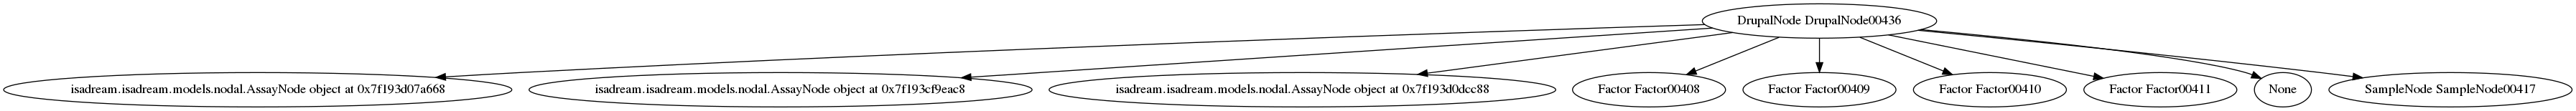

In [50]:
viewPydot(nx.nx_pydot.to_pydot(node_graph))

In [7]:
node.assays

In [8]:
node.factors

[Factor(csv_column_index=None, decimal_value=25.0, factor_type='Measurement Condition', label=(<param.parameterized.String object at 0x7f55ac56fde0>, <param.parameterized.Parameter object at 0x7f5595624e58>, <param.parameterized.Parameter object at 0x7f5595624840>), name='Factor00031', reference_value=None, string_value=None, unit_reference='Celsius'),
 Factor(csv_column_index=1, decimal_value=None, factor_type='Measurement', label=(<param.parameterized.String object at 0x7f55ac56fde0>, <param.parameterized.Parameter object at 0x7f5595624e58>, <param.parameterized.Parameter object at 0x7f5595624840>), name='Factor00032', reference_value='27_Al', string_value=None, unit_reference='ppm'),
 Factor(csv_column_index=None, decimal_value=78.204, factor_type='Measurement Condition', label=(<param.parameterized.String object at 0x7f55ac56fde0>, <param.parameterized.Parameter object at 0x7f5595624e58>, <param.parameterized.Parameter object at 0x7f5595624840>), name='Factor00033', reference_value